<div style="background-color:#f2f6fc; padding:10px; border-radius:5px; border:1px solid #d6e0f0">

**Name:** Shikha Pandey  
**Student Number:** 2462279  
**Dataset used:** BeijingPM20100101_20151231.csv

</div>

# Bank Marketing Dataset

The Bank Marketing dataset records information about clients contacted during marketing campaigns conducted by a Portuguese bank between 2008 and 2013. It includes client demographic details, past campaign interactions, and economic indicators. The goal is to predict whether a client will subscribe to a term deposit (`y`).


---

## Input Features

### Client Demographic Features
- **age:** Age of the client (numeric)  
- **job:** Type of job (categorical: admin., services, technician, etc.)  
- **marital:** Marital status (categorical: married, single, divorced)  
- **education:** Education level (categorical: basic.4y, high.school, university, etc.)  
- **default:** Has credit in default? (categorical: yes, no, unknown)  
- **housing:** Has a housing loan? (categorical: yes, no)  
- **loan:** Has a personal loan? (categorical: yes, no)  

### Communication Features
- **contact:** Contact communication type (categorical: telephone, cellular)  
- **month:** Last contact month of year (categorical: jan–dec)  
- **day_of_week:** Last contact day of week (categorical: mon–fri)  

### Campaign & Previous Contact Features
- **campaign:** Number of contacts performed during this campaign  
- **pdays:** Number of days since the client was last contacted (999 = not previously contacted)  
- **previous:** Number of contacts performed before this campaign  
- **poutcome:** Outcome of previous marketing campaign (categorical: nonexistent, failure, success)  

### Economic & Bank-related Features
- **emp.var.rate:** Employment variation rate (numeric)  
- **cons.price.idx:** Consumer price index (numeric)  
- **cons.conf.idx:** Consumer confidence index (numeric)  
- **euribor3m:** Euribor 3-month rate (numeric)  
- **nr.employed:** Number of employees (numeric)  

---

## Target Column
- **y:** Whether the client subscribed to a term deposit (binary: yes / no)

---


# Exploratory Data Analysis and Data Understanding

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Metrics imports 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    precision_recall_curve, average_precision_score,
    roc_curve, auc, RocCurveDisplay
)

# Visualization imports
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D


pd.set_option('display.max_columns', None)

In [2]:
#Loading data

df = pd.read_csv('bank-additional-full.csv', sep=';')
print("Dataset shape:", df.shape)

Dataset shape: (41188, 21)


In [3]:
# Checking first 5 rows

print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           

In [4]:
#Checking null count and datatype

print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.

In [5]:
#Checking statistics

print("Dataset Statistics:")
print(df.describe())

Dataset Statistics:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.57884

In [6]:
#Checking the distribution of target column

print("Class distribution:")
print(df['y'].value_counts())
print("\nClass distribution (percentage):")
print(df['y'].value_counts(normalize=True) * 100)


Class distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Class distribution (percentage):
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


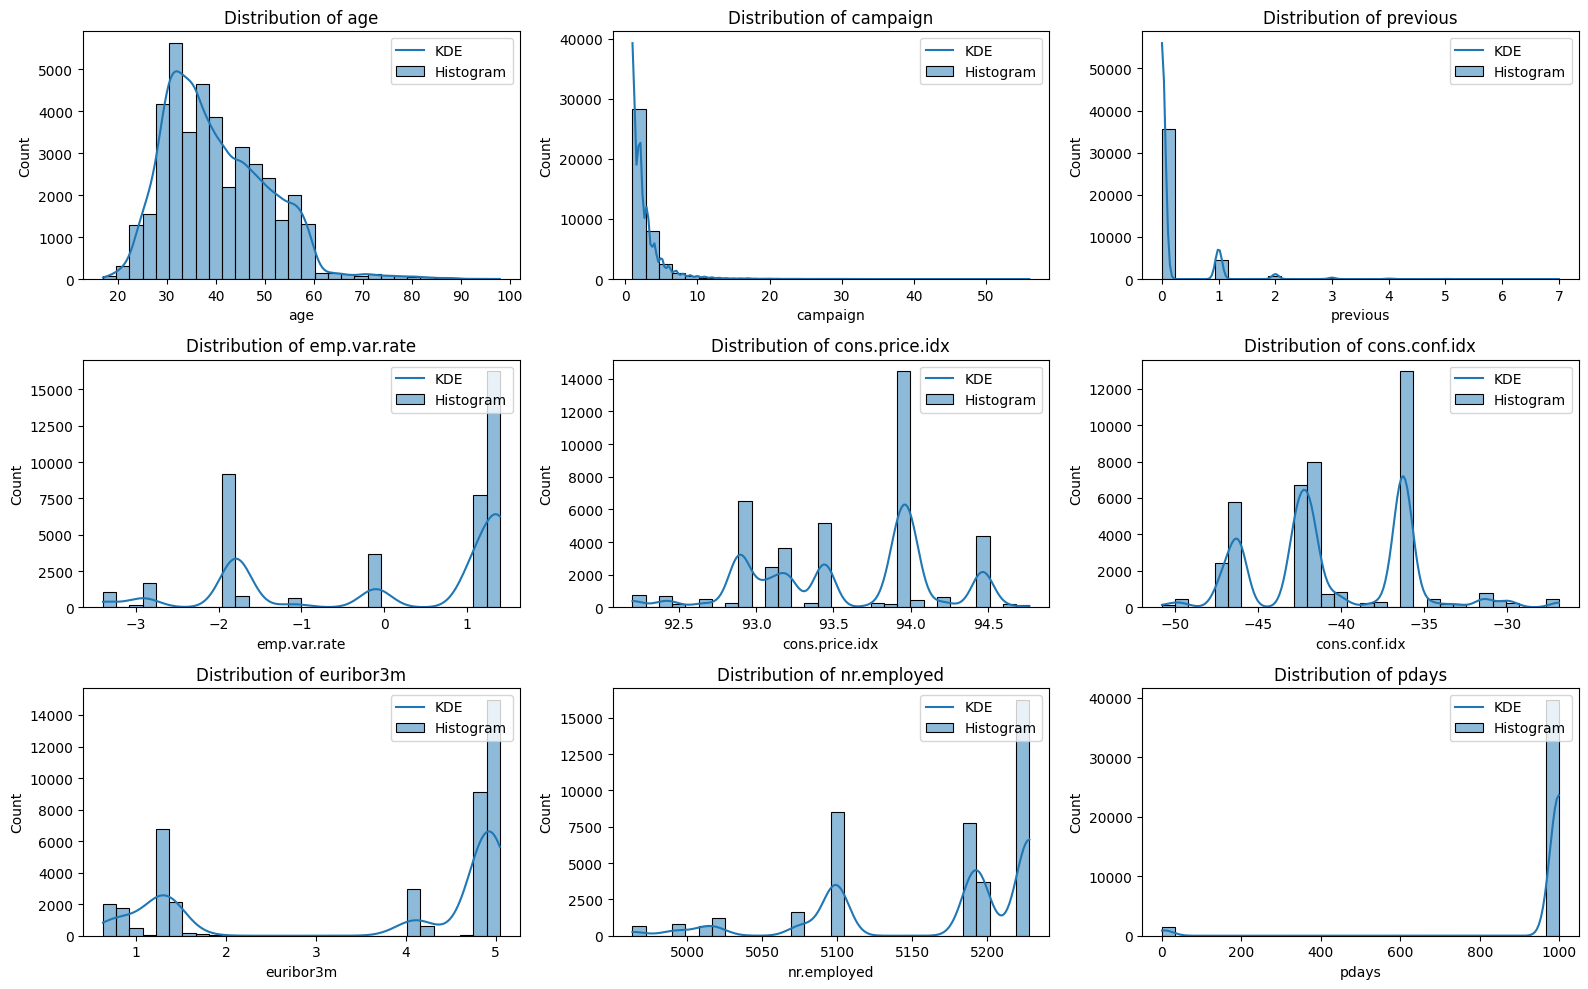

In [7]:
#Checking the skewness of numeric columns using figures

numeric_cols = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','pdays']

plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.legend(['KDE','Histogram'], loc='upper right')

plt.tight_layout()
plt.show()


The above figures show the distribution of nine numerical variables. In each figure, the x-axis contains the numerical values, and the y-axis shows their count or frequency. The bars represent histograms, while the smooth line represents KDE (Kernel Density Estimation), which helps us understand the overall shape of the data.

From the figures, we can see that the variables campaign and previous are highly right-skewed. This means most values are small, but a few values are very large. The age variable is also right-skewed, but only slightly.

Some of the other variables look sparse, which means their values are spread out and do not occur very often. The pdays variable is strongly left-skewed. This happens because the value 999 indicates that a customer was not contacted previously, so many data points are concentrated at that value.

Overall, most of the distributions look normal, but a few variables are skewed, especially those related to campaign activity. This shows that the data is not evenly distributed in all cases.

In [8]:

# Checking the skewness of numeric columns using data

skewness = df[numeric_cols].skew()
print("Skewness of numeric columns:")
print(skewness)


Skewness of numeric columns:
age               0.784697
campaign          4.762507
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
pdays            -4.922190
dtype: float64


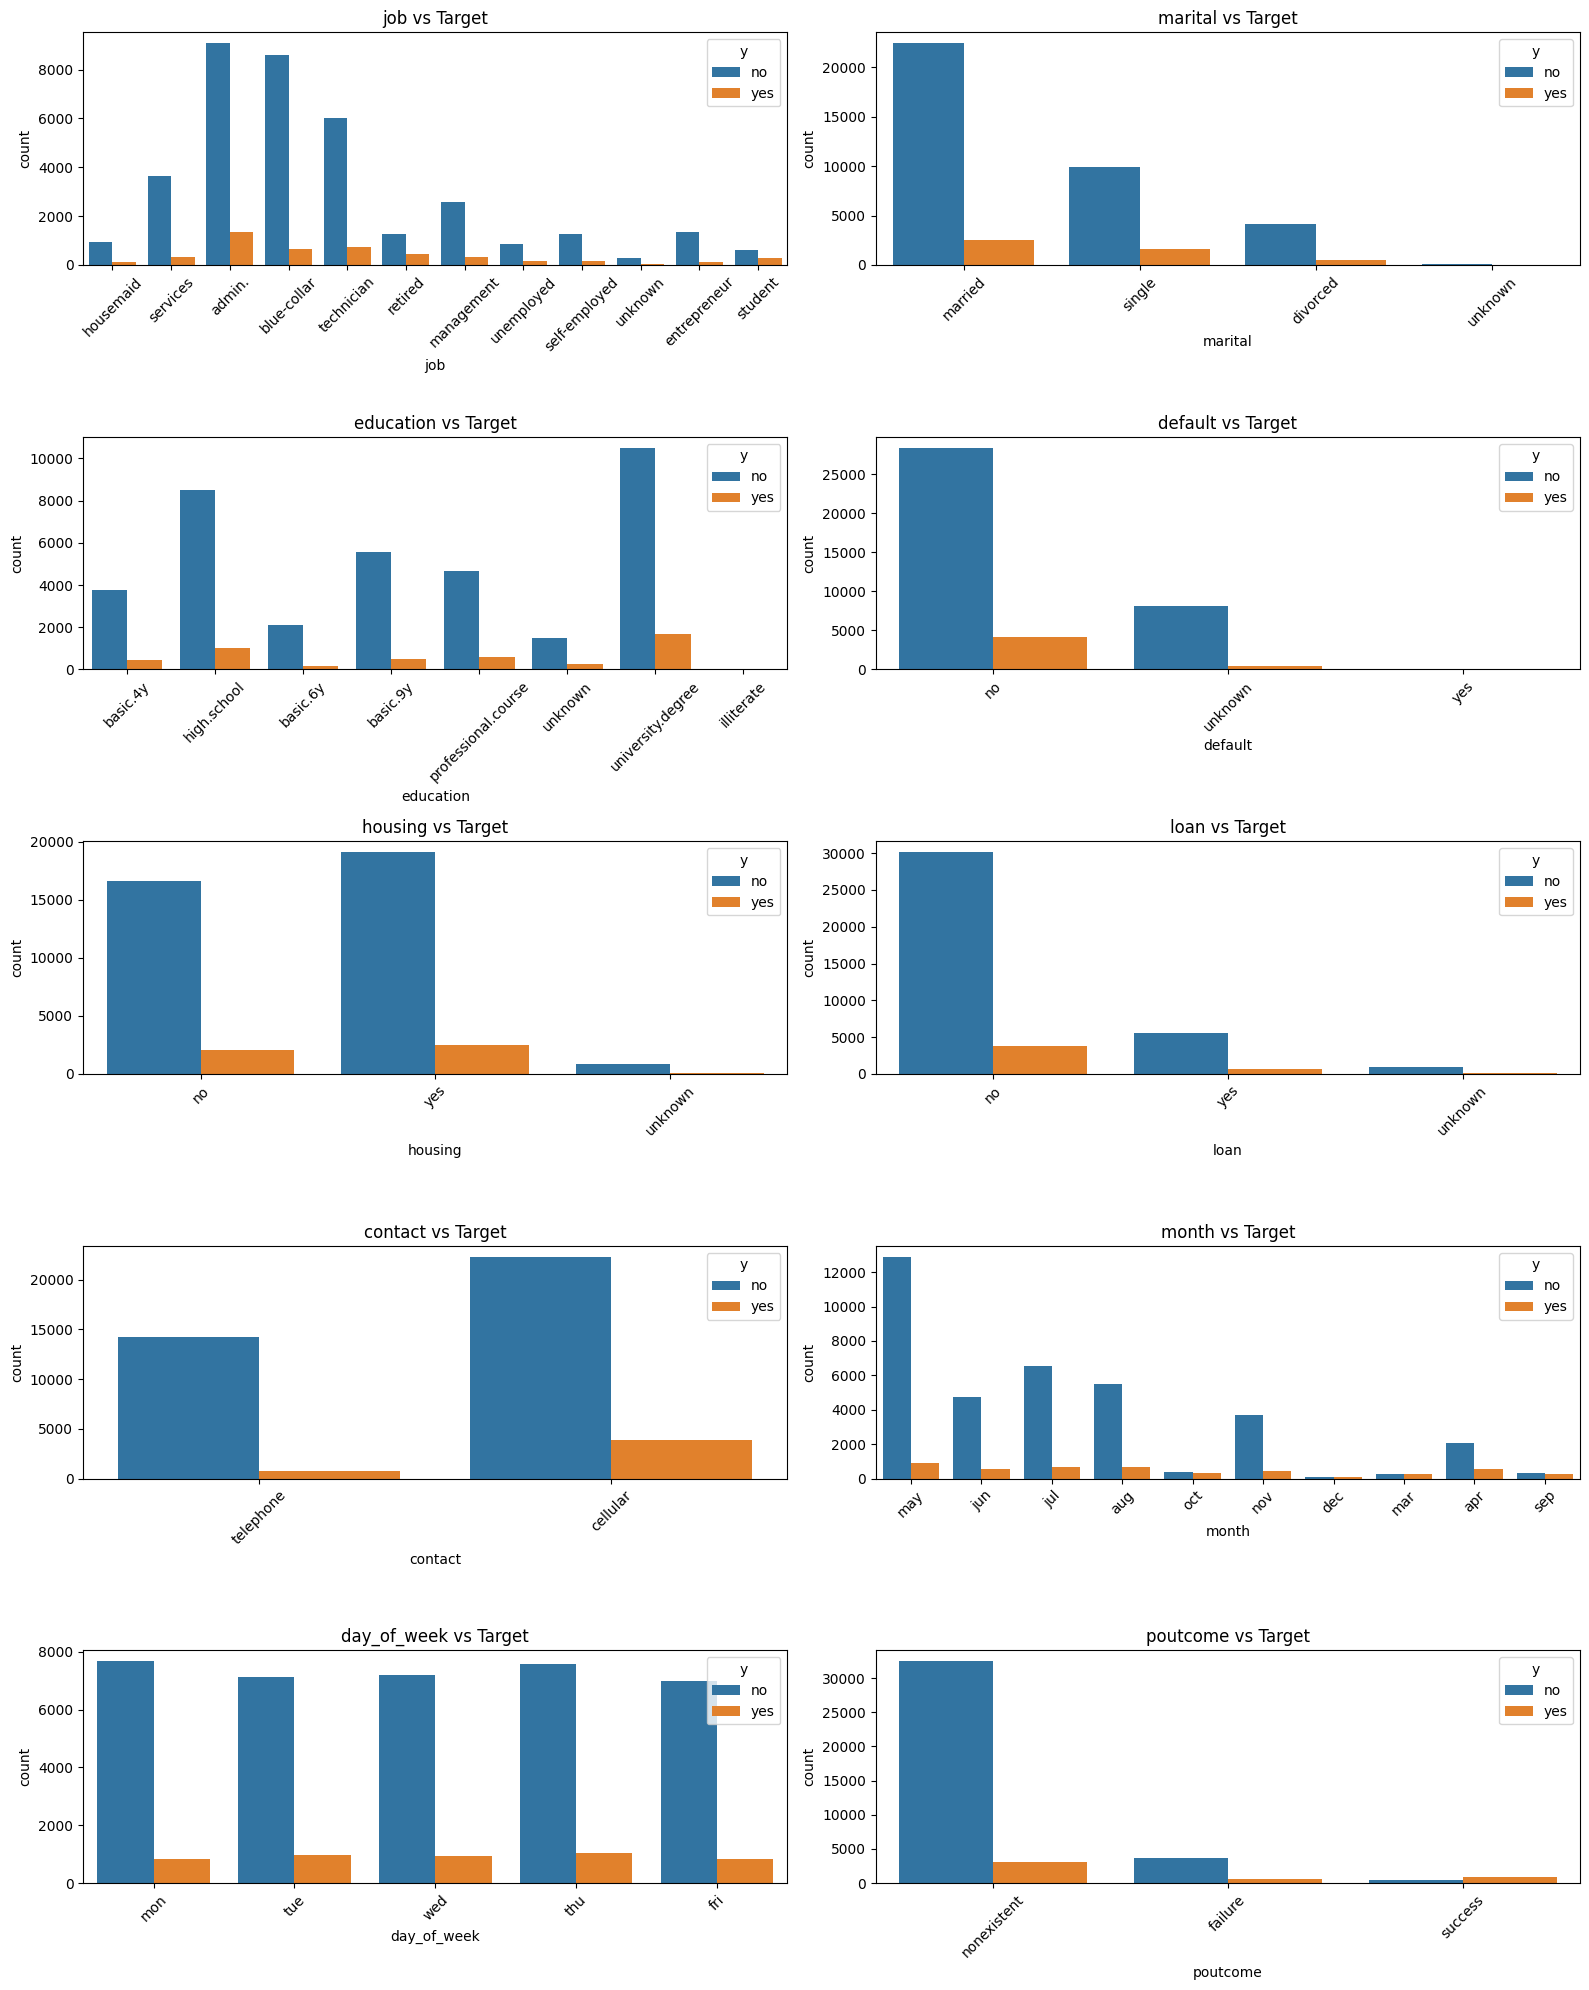

In [9]:
#Checking the relationship of categorical columns and target

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

plt.figure(figsize=(16,20))
for i, col in enumerate(categorical_cols):
    plt.subplot(5,2,i+1)
    sns.countplot(x=col, hue='y', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()


This visualization compares different customer characteristics with the target variable y, which shows whether a customer subscribed to a term deposit. Overall, there is a clear class imbalance, as “no” responses are much more common than “yes” responses across all categories. However, some groups stand out with better chances of saying yes. Students and retired customers show a higher proportion of subscriptions compared to larger groups like admin, and although May has the highest number of calls, March and September appear more effective with better conversion rates despite lower call volume. The day of the week shows almost uniform call activity and similar conversion rates, meaning scheduling does not have a strong impact. On the other hand, the previous campaign outcome is a very strong indicator of success. Most customers are new and fall under the “nonexistent” category, but customers who previously subscribed are the only group where “yes” responses exceed “no” responses. Overall, while the bank focuses heavily on married professionals with housing loans and high call volumes, the data suggests that past customer behavior and smaller, specific customer segments are far more important for improving subscription rates.

In [10]:
#Converting target values into binary

df['y'] = df['y'].map({'yes':1, 'no':0})


In [11]:
#extracting all numeric columns from the DataFrame

numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_df = df[numeric_cols]
print(numeric_df.dtypes)


age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object


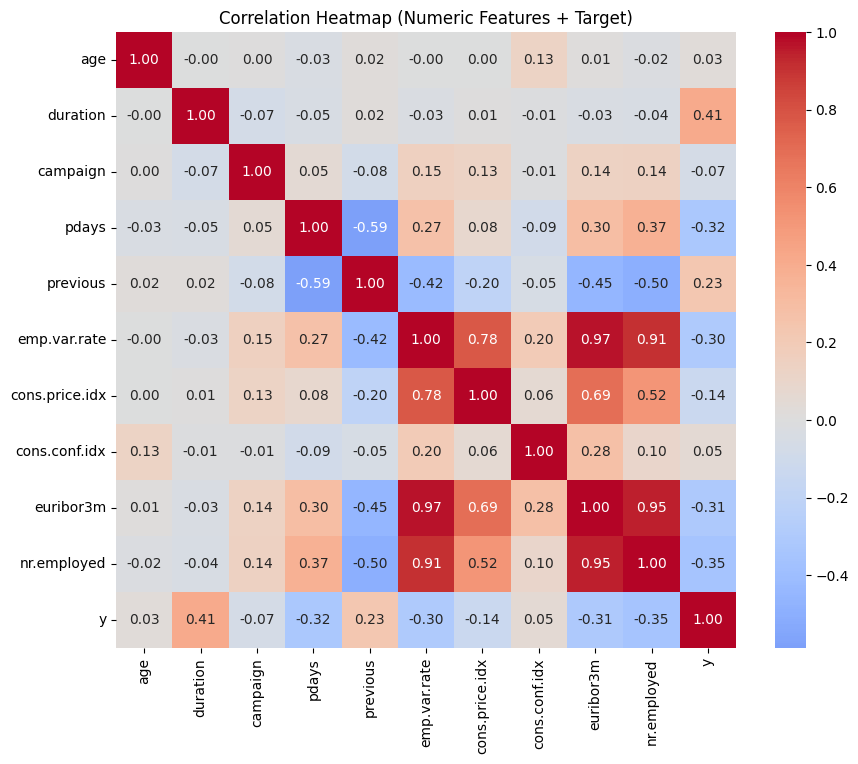

In [12]:
#Checking correlation using heatmap

corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Numeric Features + Target)")
plt.show()


This heatmap shows how the variables in the dataset relate to each other. Red areas mean two variables increase together, blue areas mean one goes up while the other goes down, and grey/white means no clear relationship.

Some variables are very strongly linked, for example, euribor3m, emp.var.rate, and nr.employed all move almost together. For predicting subscriptions, call duration is the strongest positive factor: longer calls make a “yes” more likely. Meanwhile, pdays and nr.employed have moderate negative correlations, and as expected, pdays and previous are inversely related: the longer since a last contact, the fewer previous contacts.

Overall, the heatmap helps us see which variables are redundant, which are strong predictors, and how different features relate. It can be useful for building a simpler, more effective model.

In [13]:
# Unique Values in categorical columns

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_cols:
    if 'unknown' in df[col].unique():
        print(f"{col} has unknowns:")
        print(df[col].value_counts())
        print()


job has unknowns:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital has unknowns:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education has unknowns:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

default has unknowns:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

housing has unknowns:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

loan has unknowns:
loan
no         33

In [14]:
# Checking outliers using IQR method

numeric_cols = ['age','duration','campaign','pdays','previous','emp.var.rate',
                'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = outlier_rows.shape[0]

print("Number of outliers per numeric column (IQR method):")
for k,v in outliers.items():
    print(f"{k}: {v}")


Number of outliers per numeric column (IQR method):
age: 469
duration: 2963
campaign: 2406
pdays: 1515
previous: 5625
emp.var.rate: 0
cons.price.idx: 0
cons.conf.idx: 447
euribor3m: 0
nr.employed: 0


In [15]:
# Checking outliers using IQR method in percentage

total_rows = df.shape[0]

print("Percentage of outliers per numeric column (IQR method):")
for col, count in outliers.items():
    percent = (count / total_rows) * 100
    print(f"{col}: {percent:.2f}%")

Percentage of outliers per numeric column (IQR method):
age: 1.14%
duration: 7.19%
campaign: 5.84%
pdays: 3.68%
previous: 13.66%
emp.var.rate: 0.00%
cons.price.idx: 0.00%
cons.conf.idx: 1.09%
euribor3m: 0.00%
nr.employed: 0.00%


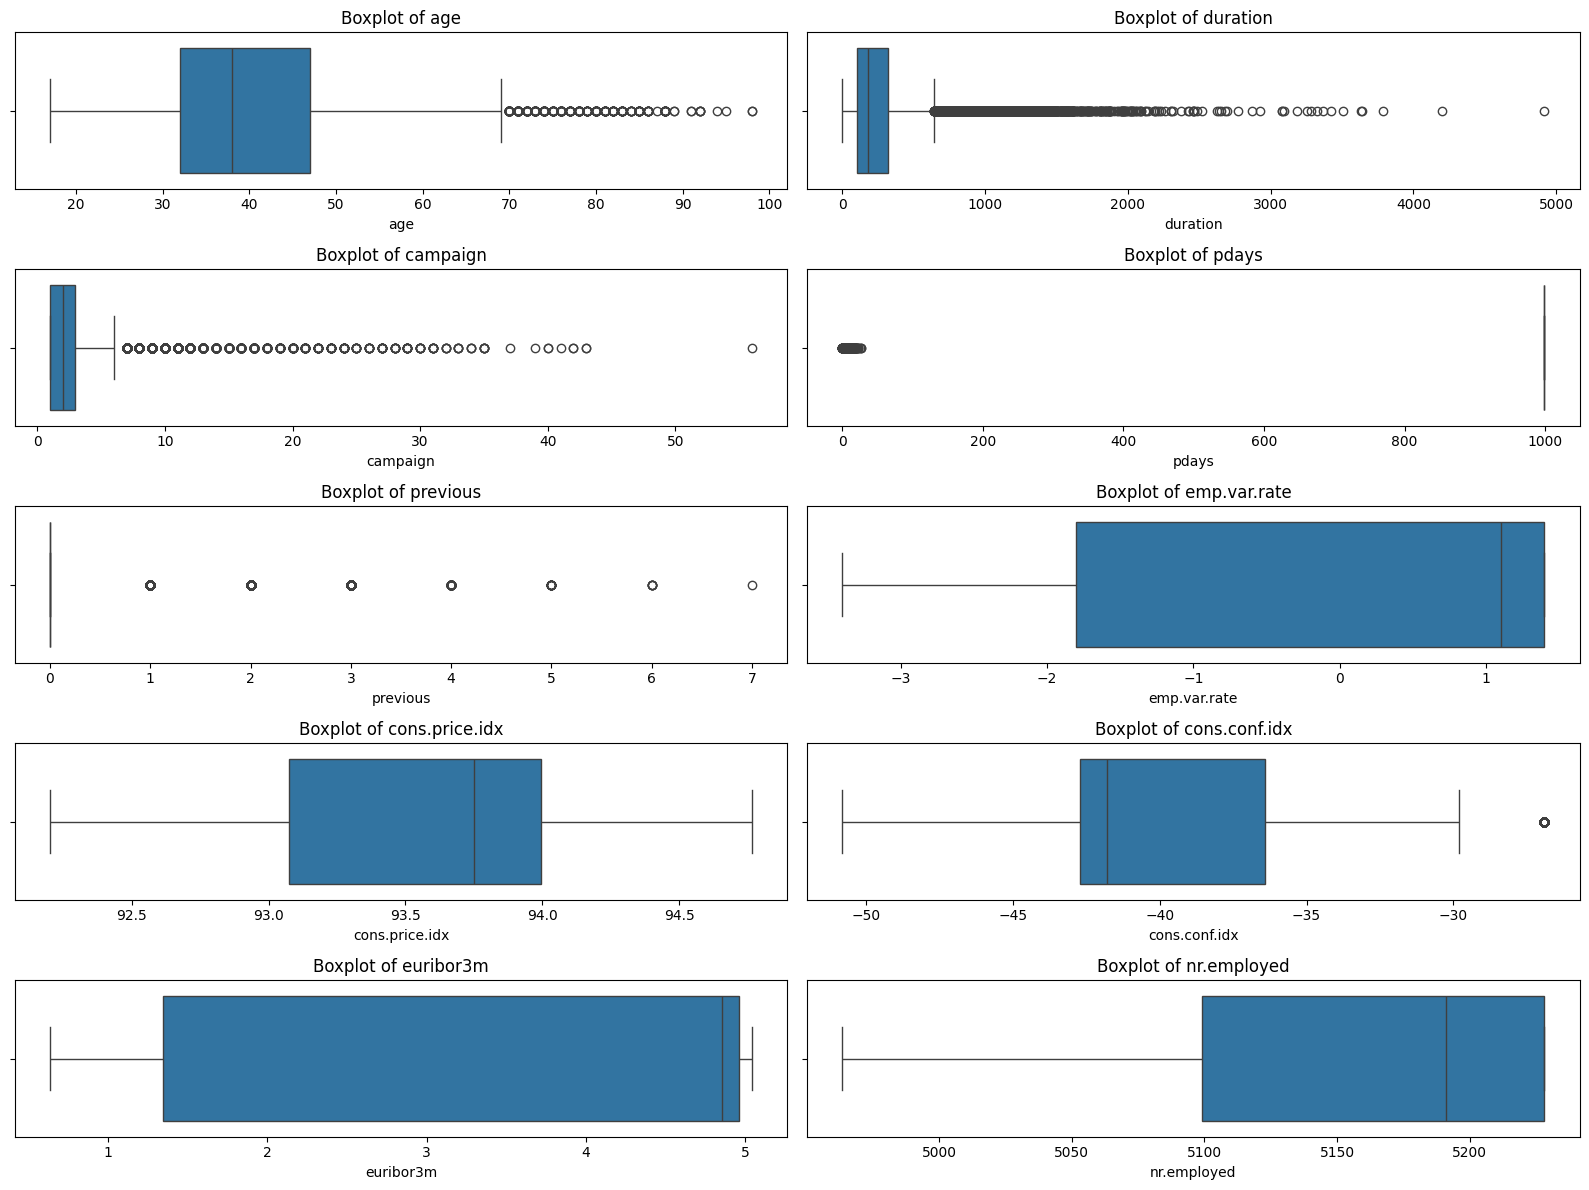

In [16]:
#Checking outliers using boxplot

numeric_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
plt.figure(figsize=(16,12))
for i, col in enumerate(numeric_cols):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


The boxplots show that many customer behavior variables are highly skewed and contain large outliers. Most values for age, call duration, and campaign are clustered at the lower end, with a few extreme cases such as very old customers or clients contacted many times. The pdays and previous plots clearly show that most customers are new contacts, since values are mostly at 999 or zero. In contrast, the economic variables like euribor3m and nr.employed have left-skewed distributions, indicating that the data was collected mainly during periods of higher interest rates and strong employment levels.

In [17]:
# Check for duplicated rows

num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 12


<h1>Data Preprocessing</h1>

In [18]:
# Removing duplicates

df = df.drop_duplicates()
print(f"New dataset shape after removing duplicates: {df.shape}")


New dataset shape after removing duplicates: (41176, 21)


In [19]:
# Small number of unknowns in these columns then replacing with mode

for col in ['default','housing','loan']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_val)
    print(f"{col} after replacing unknowns:")
    print(df[col].value_counts())
    print()

default after replacing unknowns:
default
no     41173
yes        3
Name: count, dtype: int64

housing after replacing unknowns:
housing
yes    22561
no     18615
Name: count, dtype: int64

loan after replacing unknowns:
loan
no     34928
yes     6248
Name: count, dtype: int64



In [20]:
# Columns with many unknown, turning unknown into a column

for col in ['job','marital','education']:
    print(f"{col} kept with unknowns:")
    print(df[col].value_counts())
    print()


job kept with unknowns:
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital kept with unknowns:
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

education kept with unknowns:
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64



In [21]:
#creating a binary flag indicating if someone was previously contacted , 999 means not contacted before

df['was_contacted_before'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

In [22]:
#converting categorical variables into one-hot encoded binary columns

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# drop_first=True avoids dummy variable trap

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert any boolean columns (True/False) to 0/1

bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print("Shape after one-hot encoding:", df_encoded.shape)
print("Sample columns after encoding:", df_encoded.columns[:15])
print("Data types after conversion:\n", df_encoded.dtypes[:20])


Shape after one-hot encoding: (41176, 52)
Sample columns after encoding: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'was_contacted_before', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid'],
      dtype='object')
Data types after conversion:
 age                       int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
y                         int64
was_contacted_before      int64
job_blue-collar           int64
job_entrepreneur          int64
job_housemaid             int64
job_management            int64
job_retired               int64
job_self-employed         int64
job_services              int64
job_student           

In [23]:
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,was_contacted_before,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [24]:
df_encoded.shape

(41176, 52)

In [25]:
#**Splitting data into training and testing sets while preserving class distribution.**

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (32940, 51)
X_test shape: (8236, 51)
y_train distribution:
 y
0    0.887341
1    0.112659
Name: proportion, dtype: float64
y_test distribution:
 y
0    0.887324
1    0.112676
Name: proportion, dtype: float64


In [26]:
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted_before,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
36454,24,122,2,999,1,-2.9,92.963,-40.8,1.262,5076.2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1233,32,1119,1,999,0,1.1,93.994,-36.4,4.855,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
24111,33,168,1,999,0,-0.1,93.200,-42.0,4.245,5195.8,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
15516,38,129,4,999,0,1.4,93.918,-42.7,4.957,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
17916,39,197,4,999,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [27]:
#Checking skewness

print(X_train[numeric_cols].skew().sort_values(ascending=False))

campaign          4.886092
previous          3.890351
duration          3.190959
age               0.797330
cons.conf.idx     0.305196
cons.price.idx   -0.230846
euribor3m        -0.705032
emp.var.rate     -0.720634
nr.employed      -1.042122
pdays            -4.932780
dtype: float64


In [28]:
# Identify numeric columns with high skewness

skewed_cols = ['duration', 'campaign', 'pdays', 'previous']

# Apply log1p transformation
for col in skewed_cols:
    df_encoded[col] = np.log1p(df_encoded[col])

# Check skewness after transformation
print("Skewness after log1p transformation:")
print(df_encoded[skewed_cols].skew())

Skewness after log1p transformation:
duration   -0.421499
campaign    1.350265
pdays      -5.005207
previous    2.586511
dtype: float64


In [29]:

# Numeric columns to scale (after log transformation)
numeric_cols = ['age','duration','campaign','pdays','previous',
                'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


X_train[numeric_cols].head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36454,-1.532272,-0.527170,-0.202879,0.195027,1.657135,-1.896387,-1.057203,-0.062687,-1.357248,-1.252900
1233,-0.766955,3.344770,-0.563899,0.195027,-0.348598,0.648985,0.722038,0.887842,0.712567,0.332805
24111,-0.671290,-0.348525,-0.563899,0.195027,-0.348598,-0.114627,-0.648202,-0.321922,0.361165,0.399107
15516,-0.192967,-0.499985,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.771326,0.845259
17916,-0.097303,-0.235901,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.773630,0.845259


In [30]:
X_train.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,was_contacted_before,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
36454,-1.532272,-0.527170,-0.202879,0.195027,1.657135,-1.896387,-1.057203,-0.062687,-1.357248,-1.252900,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1233,-0.766955,3.344770,-0.563899,0.195027,-0.348598,0.648985,0.722038,0.887842,0.712567,0.332805,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
24111,-0.671290,-0.348525,-0.563899,0.195027,-0.348598,-0.114627,-0.648202,-0.321922,0.361165,0.399107,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
15516,-0.192967,-0.499985,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.771326,0.845259,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
17916,-0.097303,-0.235901,0.519161,0.195027,-0.348598,0.839888,0.590881,-0.473142,0.773630,0.845259,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


# fixing imbalanced class

In [31]:
# from imblearn.over_sampling import SMOTE


# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# print("Original class distribution:\n", y_train.value_counts())
# print("Resampled class distribution:\n", y_train_res.value_counts())

#This did not help so i removed it 

<h1>Neural network</h1>

In [32]:

# computing sample weights for class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)


#  2 hidden layers (64, 32 neurons), ReLU activation, sigmoid output for binary classification
mlp = MLPClassifier(
    hidden_layer_sizes=(64,32),
    activation='relu',
    max_iter=500,
    random_state=42
)


mlp.fit(X_train, y_train, sample_weight=sample_weights)
y_probs = mlp.predict_proba(X_test)[:, 1]

#Optimizing Threshold
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f} with F1-score: {best_f1:.3f}")

y_pred = (y_probs >= best_threshold).astype(int)

print("=== MLP Classifier Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best threshold: 0.28 with F1-score: 0.586
=== MLP Classifier Metrics ===
Accuracy: 0.8761534725594949
Precision: 0.470013037809648
Recall: 0.7769396551724138
F1-Score: 0.5857026807473599

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      7308
           1       0.47      0.78      0.59       928

    accuracy                           0.88      8236
   macro avg       0.72      0.83      0.76      8236
weighted avg       0.91      0.88      0.89      8236



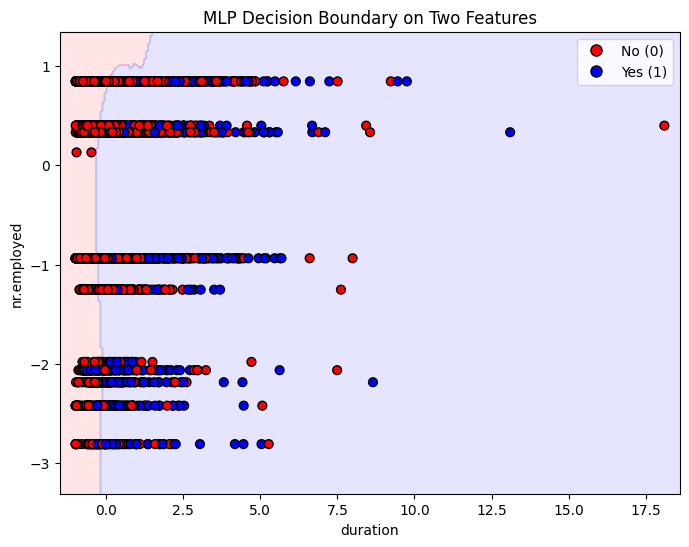

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Select two features for visualization
feature_x = 'duration'
feature_y = 'nr.employed'

X_vis = X_test[[feature_x, feature_y]].values
y_vis = y_test.values

# Creating a meshgrid
x_min, x_max = X_vis[:,0].min() - 0.5, X_vis[:,0].max() + 0.5
y_min, y_max = X_vis[:,1].min() - 0.5, X_vis[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Preparing full feature grid
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Create full input with mean values for other features
X_grid_full = np.tile(X_train.mean().values, (grid_points.shape[0],1))
X_grid_full[:, X_train.columns.get_loc(feature_x)] = grid_points[:,0]
X_grid_full[:, X_train.columns.get_loc(feature_y)] = grid_points[:,1]

# Convert to DataFrame to match training feature names
X_grid_full_df = pd.DataFrame(X_grid_full, columns=X_train.columns)

#Predict probabilities
Z = mlp.predict_proba(X_grid_full_df)[:,1]
Z = (Z >= best_threshold).astype(int)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
scatter = plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, cmap=cmap_bold, edgecolor='k', s=40)

plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("MLP Decision Boundary on Two Features")


handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='No (0)', markerfacecolor='#FF0000', markersize=8, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w', label='Yes (1)', markerfacecolor='#0000FF', markersize=8, markeredgecolor='k')
]
plt.legend(handles=handles, loc='upper right')

plt.show()


This plot shows how a neural network (MLP) tries to separate outcomes using call duration and nr.employed. The model divides the space into two regions: red for “No” and blue for “Yes.” The mostly vertical boundary shows that duration is the dominant factor—once it crosses a certain point, the model is more likely to predict a subscription. However, there are many points that fall into the “wrong” region, meaning both classes overlap heavily. This tells us that these two features alone are not enough to make accurate predictions, and the model ends up learning a simple threshold rule that struggles with the complexity of the data.

<h1>Trying Logistic Regression</h1>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

lr = LogisticRegression(max_iter=500, random_state=42, class_weight='balanced')


lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.8626760563380281
Precision: 0.44609665427509293
Recall: 0.9051724137931034
F1-Score: 0.5976520811099253

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7308
           1       0.45      0.91      0.60       928

    accuracy                           0.86      8236
   macro avg       0.72      0.88      0.76      8236
weighted avg       0.93      0.86      0.88      8236



<h1>Trying Gradient Boost</h1>

In [35]:
#class weight did not work good here so removed

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-Score:", f1_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))



Gradient Boosting Metrics:
Accuracy: 0.9173142302088393
Precision: 0.6545682102628285
Recall: 0.5635775862068966
F1-Score: 0.6056745801968731

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7308
           1       0.65      0.56      0.61       928

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236



<h1>HyperParameter Tuning</h1>

### for logistic regression model

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(max_iter=2000, solver='liblinear')

# Wider range for C (inverse of regularization)
param_dist = {
    'C': loguniform(0.001, 1000),
    'penalty': ['l1', 'l2']
}

rand_lr = RandomizedSearchCV(
    lr,
    param_distributions=param_dist,
    n_iter=30,  
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_lr.fit(X_train, y_train)

print("Best LR parameters:", rand_lr.best_params_)
print("Best LR CV score:", rand_lr.best_score_)


Best LR parameters: {'C': np.float64(493.52962094021007), 'penalty': 'l2'}
Best LR CV score: 0.5228155112313664


### for gradient boosting model

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    'n_estimators': randint(100, 400),        
    'learning_rate': uniform(0.01, 0.19),     
    'max_depth': randint(1, 4),               
    'min_samples_split': randint(2, 6),       
    'min_samples_leaf': randint(1, 3)         
}

rand_gb = RandomizedSearchCV(
    gb,
    param_distributions=param_dist_gb,
    n_iter=50,   
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

rand_gb.fit(X_train, y_train)

print("Best GB parameters:", rand_gb.best_params_)
print("Best GB CV score:", rand_gb.best_score_)


Best GB parameters: {'learning_rate': np.float64(0.07698808270349211), 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 236}
Best GB CV score: 0.5945383318098474


<h1>Feature Selection </h1>

### for Logistic Regression

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

best_lr = LogisticRegression(
    C=rand_lr.best_params_['C'],
    penalty=rand_lr.best_params_['penalty'],
    solver='liblinear',
    max_iter=2000
)

# RFE to select top 20 features
rfe = RFE(estimator=best_lr, n_features_to_select=20) 
rfe.fit(X_train, y_train)

# Get selected features
selected_features_lr = X_train.columns[rfe.support_].tolist()
print("Selected features for Logistic Regression:\n", selected_features_lr)


Selected features for Logistic Regression:
 ['duration', 'pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'was_contacted_before', 'job_blue-collar', 'job_retired', 'job_student', 'education_illiterate', 'contact_telephone', 'month_aug', 'month_dec', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']


### for Gradient Boost


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# GB model with the best parameters
best_gb = GradientBoostingClassifier(
    n_estimators=236,
    learning_rate=0.07698808270349211,
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=1,
    random_state=42
)

# Fit on training data
best_gb.fit(X_train, y_train)

# Feature importances
feat_imp = pd.Series(best_gb.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)

# Top 20 features
top_features_gb = feat_imp.head(20).index.tolist()
print("Top features for Gradient Boosting:\n", top_features_gb)


Top features for Gradient Boosting:
 ['duration', 'nr.employed', 'euribor3m', 'pdays', 'cons.conf.idx', 'cons.price.idx', 'poutcome_success', 'age', 'month_oct', 'month_mar', 'contact_telephone', 'emp.var.rate', 'previous', 'campaign', 'month_may', 'was_contacted_before', 'day_of_week_mon', 'education_university.degree', 'day_of_week_tue', 'poutcome_nonexistent']


# Creating model with best hyperparameters and top features

In [40]:
# Train and test with selected features for Logistic Regression
X_train_lr_selected = X_train[selected_features_lr]
X_test_lr_selected = X_test[selected_features_lr]

# Train and test with selected features for Gradient Boosting
X_train_gb_selected = X_train[top_features_gb]
X_test_gb_selected = X_test[top_features_gb]

In [41]:
# Logistic Regression with best hyperparameters and selected features
final_lr = LogisticRegression(
    C=rand_lr.best_params_['C'],
    penalty=rand_lr.best_params_['penalty'],
    solver='liblinear',
    max_iter=2000,
    class_weight='balanced',
    random_state=42
)


final_lr.fit(X_train_lr_selected, y_train)
y_pred_lr_final = final_lr.predict(X_test_lr_selected)

# Get cross-validation score from the randomized search
cv_score_lr = rand_lr.best_score_


accuracy_lr = accuracy_score(y_test, y_pred_lr_final)
precision_lr = precision_score(y_test, y_pred_lr_final)
recall_lr = recall_score(y_test, y_pred_lr_final)
f1_lr = f1_score(y_test, y_pred_lr_final)

In [42]:
#Gradient Boosting with best hyperparameters and selected features
final_gb = GradientBoostingClassifier(
    n_estimators=rand_gb.best_params_['n_estimators'],
    learning_rate=rand_gb.best_params_['learning_rate'],
    max_depth=rand_gb.best_params_['max_depth'],
    min_samples_split=rand_gb.best_params_['min_samples_split'],
    min_samples_leaf=rand_gb.best_params_['min_samples_leaf'],
    random_state=42
)


final_gb.fit(X_train_gb_selected, y_train)
y_pred_gb_final = final_gb.predict(X_test_gb_selected)

# Get cross-validation score from the randomized search
cv_score_gb = rand_gb.best_score_


accuracy_gb = accuracy_score(y_test, y_pred_gb_final)
precision_gb = precision_score(y_test, y_pred_gb_final)
recall_gb = recall_score(y_test, y_pred_gb_final)
f1_gb = f1_score(y_test, y_pred_gb_final)

In [43]:
# Create a DataFrame for the comparison table
comparison_data = {
    'Model': ['Logistic Regression', 'Gradient Boosting'],
    'Features': [
        f'Selected ({len(selected_features_lr)})',
        f'Selected ({len(top_features_gb)})'
    ],
    'CV Score': [round(cv_score_lr, 3), round(cv_score_gb, 3)],
    'Accuracy': [round(accuracy_lr, 3), round(accuracy_gb, 3)],
    'Precision': [round(precision_lr, 3), round(precision_gb, 3)],
    'Recall': [round(recall_lr, 3), round(recall_gb, 3)],
    'F1-Score': [round(f1_lr, 3), round(f1_gb, 3)]
}

comparison_df = pd.DataFrame(comparison_data)

In [44]:

print("Table 1: Comparison of Final Classification Models")
print("-" * 100)
print(f"{'Model':<25} {'Features':<15} {'CV Score':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 100)

# Print Logistic Regression row
print(f"{'Logistic Regression':<25} "
      f"{f'Selected ({len(selected_features_lr)})':<15} "
      f"{round(cv_score_lr, 3):<10} "
      f"{round(accuracy_lr, 3):<10} "
      f"{round(precision_lr, 3):<10} "
      f"{round(recall_lr, 3):<10} "
      f"{round(f1_lr, 3):<10}")

# Print Gradient Boosting row
print(f"{'Gradient Boosting':<25} "
      f"{f'Selected ({len(top_features_gb)})':<15} "
      f"{round(cv_score_gb, 3):<10} "
      f"{round(accuracy_gb, 3):<10} "
      f"{round(precision_gb, 3):<10} "
      f"{round(recall_gb, 3):<10} "
      f"{round(f1_gb, 3):<10}")

print("-" * 100)

Table 1: Comparison of Final Classification Models
----------------------------------------------------------------------------------------------------
Model                     Features        CV Score   Accuracy   Precision  Recall     F1-Score  
----------------------------------------------------------------------------------------------------
Logistic Regression       Selected (20)   0.523      0.862      0.445      0.9        0.596     
Gradient Boosting         Selected (20)   0.595      0.916      0.649      0.56       0.602     
----------------------------------------------------------------------------------------------------


## Plotting figures but better visualization of results

### Gradient Boost

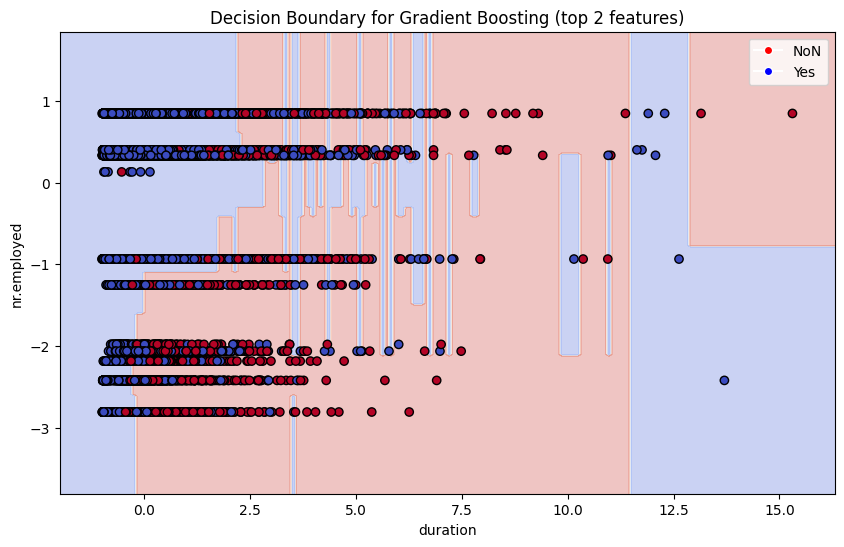

In [45]:

# Pick two top features
feat1, feat2 = top_features_gb[0], top_features_gb[1]

X_plot = X_train_gb_selected[[feat1, feat2]].values
y_plot = y_train.values

# Fit a model on just these two features
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(**rand_gb.best_params_, random_state=42)
model.fit(X_plot, y_plot)

# Create a meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolor='k')
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='NoN'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Yes')]
plt.legend(handles=legend_elements)
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title("Decision Boundary for Gradient Boosting (top 2 features)")
plt.show()


This plot shows how a Gradient Boosting model makes predictions based on two features: duration (call length) and nr.employed (number of employees). The background colors represent the model’s predicted classes: blue areas for “Yes” and red areas for “No.” The jagged, boxy boundaries are typical of tree-based models, which split data into rectangular segments using “if-then” logic.

The scatter points show actual outcomes: red dots for “No” and blue dots for “Yes.” There is noticeable overlap, meaning these two features alone cannot perfectly separate the classes. Horizontal lines of points show that nr.employed is discrete, while duration is continuous. The thin vertical “slivers” where the model predicts isolated blue or red regions indicate potential overfitting, especially around duration values of 5–10, where the model tries to capture single outliers.

It’s worth noting that this model was trained using the best hyperparameters and the top features, which likely improved performance but also contributed to this overfitting behavior. Overall, the plot shows that while the model captures general trends, it struggles with noisy, overlapping data.

### Logistic Regression

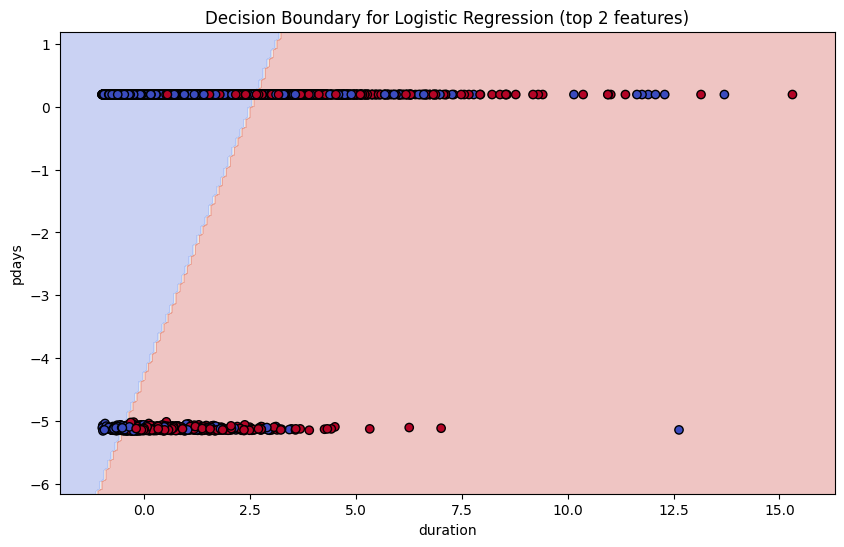

In [46]:
# Pick two top features from LR selection
feat1, feat2 = selected_features_lr[0], selected_features_lr[1]

X_plot = X_train_lr_selected[[feat1, feat2]].values
y_plot = y_train.values

# Fit logistic regression on these two features
lr_model = LogisticRegression(
    C=rand_lr.best_params_['C'],
    penalty=rand_lr.best_params_['penalty'],
    solver='liblinear',
    max_iter=2000
)

lr_model.fit(X_plot, y_plot)

# Create meshgrid for decision boundary
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.title("Decision Boundary for Logistic Regression (top 2 features)")
plt.show()


This plot shows the decision boundary of a Logistic Regression model using two features: duration (length of last contact) and pdays (days since previous contact). The shaded areas show the model’s predicted classes: red for “yes” and blue for “no.” The straight line where the colors meet is the decision boundary, which represents the threshold where the model predicts a 50/50 chance.

Because Logistic Regression can only create linear boundaries, the line is straight. You can see some mixing of classes, with red dots in the blue area and blue dots in the red area, showing that these two features alone can’t perfectly separate the outcomes. The data also clusters in bands along the pdays axis, reflecting common values like “never contacted” or recent contacts. Overall, the plot illustrates how the model separates classes and where it struggles.

# ROC Curve

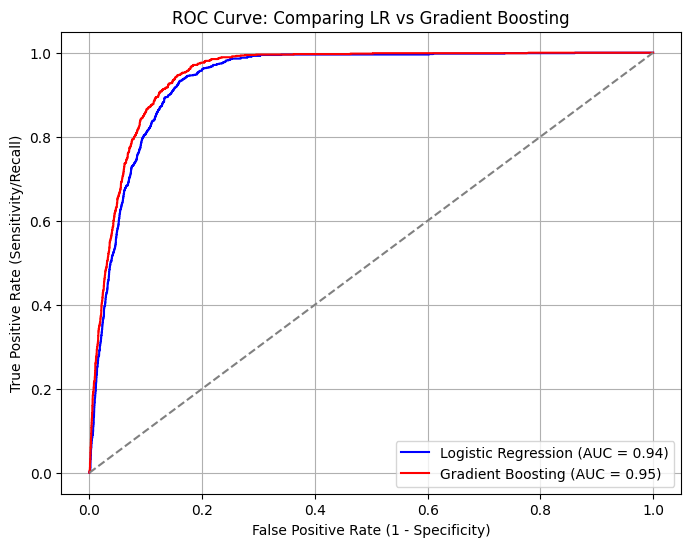

In [47]:


y_prob_lr = final_lr.predict_proba(X_test_lr_selected)[:, 1]
y_prob_gb = final_gb.predict_proba(X_test_gb_selected)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_gb, tpr_gb, color='red', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curve: Comparing LR vs Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

This graph shows a ROC curve, which is used to evaluate how well a binary classification model can distinguish between classes. It plots the true positive rate against the false positive rate at different thresholds. In this plot, the Gradient Boosting model (red line) performs slightly better than Logistic Regression (blue line), because its curve is closer to the top-left corner. The AUC (Area Under the Curve) confirms this: Gradient Boosting scores 0.95, while Logistic Regression scores 0.94. Since 1.0 is perfect and 0.5 is no better than random guessing, both models are very accurate, with Gradient Boosting having a small advantage.

# Precision Recall Curve

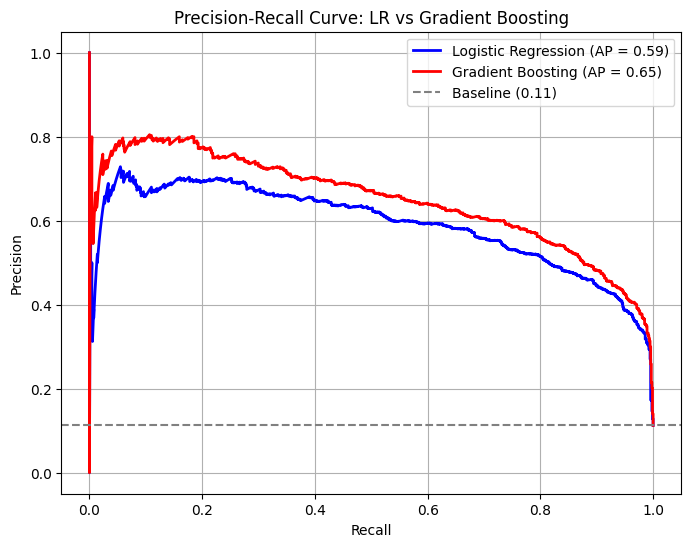

In [48]:

y_prob_lr = final_lr.predict_proba(X_test_lr_selected)[:, 1]
y_prob_gb = final_gb.predict_proba(X_test_gb_selected)[:, 1]

# 2. Calculating Precision-Recall values
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_prob_gb)

# 3. Calculating Average Precision (AP) scores
ap_lr = average_precision_score(y_test, y_prob_lr)
ap_gb = average_precision_score(y_test, y_prob_gb)

# 4. Plotting
plt.figure(figsize=(8,6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label=f'Logistic Regression (AP = {ap_lr:.2f})')
plt.plot(recall_gb, precision_gb, color='red', lw=2, label=f'Gradient Boosting (AP = {ap_gb:.2f})')

# Adding a baseline: the proportion of positive cases (subs / total)
baseline = sum(y_test == 1) / len(y_test)
plt.axhline(y=baseline, color='gray', linestyle='--', label=f'Baseline ({baseline:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: LR vs Gradient Boosting')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

This plot shows a Precision-Recall (PR) curve, which helps us see how well a model balances catching all positive cases (recall) with being correct when it predicts positive (precision). The Gradient Boosting model (red line) clearly outperforms Logistic Regression (blue line), with a higher average precision score of 0.65 vs. 0.59, meaning it is generally more accurate across different levels of recall. The curve trends downward because of the precision-recall trade-off: when the model tries to catch more positives, it also makes more mistakes, lowering precision. Since the dataset is imbalanced (only about 11% positives), the PR curve is more useful than an ROC curve for evaluating performance, and the red line staying mostly above the blue line shows that Gradient Boosting handles the rare positive cases better than Logistic Regression.